Setup for imports and input data from dataset.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
col = pd.read_excel('Sample - Superstore.xls', nrows=0).columns
df = pd.read_excel('Sample - Superstore.xls', names = col, index_col='Row ID')
df.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Data Preprocessing.

In [37]:
#Code for Preprocessing.
# Dropping of the unnecessary features for our business problem
df = df.drop(columns=['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Country', 'Region'])
df

,Order ID,Customer ID,Segment,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,
1,CA-2016-152156,CG-12520,Consumer,Henderson,Kentucky,42420,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,CG-12520,Consumer,Henderson,Kentucky,42420,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,DV-13045,Corporate,Los Angeles,California,90036,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,SO-20335,Consumer,Fort Lauderdale,Florida,33311,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,SO-20335,Consumer,Fort Lauderdale,Florida,33311,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,CA-2014-110422,TB-21400,Consumer,Miami,Florida,33180,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9991,CA-2017-121258,DB-13060,Consumer,Costa Mesa,California,92627,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9992,CA-2017-121258,DB-13060,Consumer,Costa Mesa,California,92627,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


In [38]:
# Separating the features into categorical and continuous dataframes
cont_df = df.drop(columns = ['Order ID', 'Customer ID', 'Segment', 'City', 'State', 'Postal Code', 'Product ID', 'Category', 'Sub-Category', 'Product Name'])
cat_df = df.drop(columns = ['Sales', 'Quantity', 'Discount', 'Profit'])
display(cont_df.head()) 
display(cat_df.head())

,Sales,Quantity,Discount,Profit
Row ID,,,,
1,261.9600,2,0.00,41.9136
2,731.9400,3,0.00,219.5820
3,14.6200,2,0.00,6.8714
4,957.5775,5,0.45,-383.0310
5,22.3680,2,0.20,2.5164


,Order ID,Customer ID,Segment,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name
Row ID,,,,,,,,,,
1,CA-2016-152156,CG-12520,Consumer,Henderson,Kentucky,42420,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
2,CA-2016-152156,CG-12520,Consumer,Henderson,Kentucky,42420,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
3,CA-2016-138688,DV-13045,Corporate,Los Angeles,California,90036,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
4,US-2015-108966,SO-20335,Consumer,Fort Lauderdale,Florida,33311,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
5,US-2015-108966,SO-20335,Consumer,Fort Lauderdale,Florida,33311,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


Outliers and Visualizations
2 Standard deviations away from the mean net generally less outliers (With acknowledging that Quantity has more outliers using this method, and Discount is the exact same amount in either method)

In [39]:
#Outlier detection Standard Deviation
def getMean(cont_df):
    return cont_df.mean()

def getSTD(cont_df):
    return cont_df.std()

def STD_upper(cont_df):
    return (getMean(cont_df) + (2 * getSTD(cont_df)))

def STD_lower(cont_df):
    return (getMean(cont_df) - (2 * getSTD(cont_df)))

def STD_outlier(cont_df):
    return cont_df[((cont_df < STD_lower(cont_df))) | (cont_df > STD_upper(cont_df))]
df_Sales = STD_outlier(cont_df['Sales'])
print("Outliers for Sales", 'Length:', len(df_Sales))
print("New boundries adjusted with IQR method: " , STD_lower(cont_df['Sales']), ',', STD_upper(cont_df['Sales'])) 
df_Quantity = STD_outlier(cont_df['Quantity'])
print("Outliers for Quantity", 'Length:', len(df_Quantity))
print("New boundries adjusted with IQR method: " , STD_lower(cont_df['Quantity']), ',', STD_upper(cont_df['Quantity'])) 
df_Discount = STD_outlier(cont_df['Discount'])
print("Outliers for Discount", 'Length:', len(df_Discount))
print("New boundries adjusted with IQR method: " , STD_lower(cont_df['Discount']), ',', STD_upper(cont_df['Discount'])) 
df_Profit = STD_outlier(cont_df['Profit'])
print("Outliers for Profit", 'Length:', len(df_Profit))
print("New boundries adjusted with IQR method: " , STD_lower(cont_df['Profit']), ',', STD_upper(cont_df['Profit'])) 

Outliers for Sales Length: 247
New boundries adjusted with IQR method:  -1016.6322001868699 , 1476.3482018478576
Outliers for Quantity Length: 428
New boundries adjusted with IQR method:  -0.660645638036307 , 8.239793126529403
Outliers for Discount Length: 856
New boundries adjusted with IQR method:  -0.2567012140184075 , 0.5691066572843861
Outliers for Profit Length: 179
New boundries adjusted with IQR method:  -439.8633190741304 , 497.1771116897


In [40]:
#Outlier detections IQR
def Q1(cont_df):
    return cont_df.quantile(0.25)

def Q3(cont_df):
    return cont_df.quantile(0.75)

def IQR(cont_df):
    return Q3(cont_df) - Q1(cont_df)

def Lowerbound(cont_df):
    return (Q1(cont_df) - 1.5*(IQR(cont_df)))

def Upperbound(cont_df):
    return (Q3(cont_df) + 1.5*(IQR(cont_df)))
def IQR_outlier(cont_df):
    return cont_df[((cont_df < Lowerbound(cont_df)) | (cont_df > Upperbound(cont_df)))]
df_Sales = IQR_outlier(cont_df['Sales'])
print("Outliers for Sales", 'Length:', len(df_Sales))
print("New boundries adjusted with IQR method: " , Lowerbound(cont_df['Sales']), ',', Upperbound(cont_df['Sales'])) 
df_Quantity = IQR_outlier(cont_df['Quantity'])
print("Outliers for Quantity",  'Length:', len(df_Quantity))
print("New boundries adjusted with IQR method: " , Lowerbound(cont_df['Quantity']), ',', Upperbound(cont_df['Quantity'])) 
df_Discount = IQR_outlier(cont_df['Discount'])
print("Outliers for Discount",  'Length:', len(df_Discount))
print("New boundries adjusted with IQR method: " , Lowerbound(cont_df['Discount']), ',', Upperbound(cont_df['Discount'])) 
df_Profit = IQR_outlier(cont_df['Profit'])
print("Outliers for Profit",  'Length:', len(df_Profit))
print("New boundries adjusted with IQR method: " , Lowerbound(cont_df['Profit']), ',', Upperbound(cont_df['Profit'])) 

Outliers for Sales Length: 1167
New boundries adjusted with IQR method:  -271.71000000000004 , 498.93
Outliers for Quantity Length: 170
New boundries adjusted with IQR method:  -2.5 , 9.5
Outliers for Discount Length: 856
New boundries adjusted with IQR method:  -0.30000000000000004 , 0.5
Outliers for Profit Length: 1881
New boundries adjusted with IQR method:  -39.724124999999994 , 70.81687499999998


Data Quality Reports for Continuous Features.

In [41]:
#Code for continuous features.


Data Quality Reports for Categorical Features.

In [42]:
#Code for categorical features.

Data Visualization of Continuous Features.

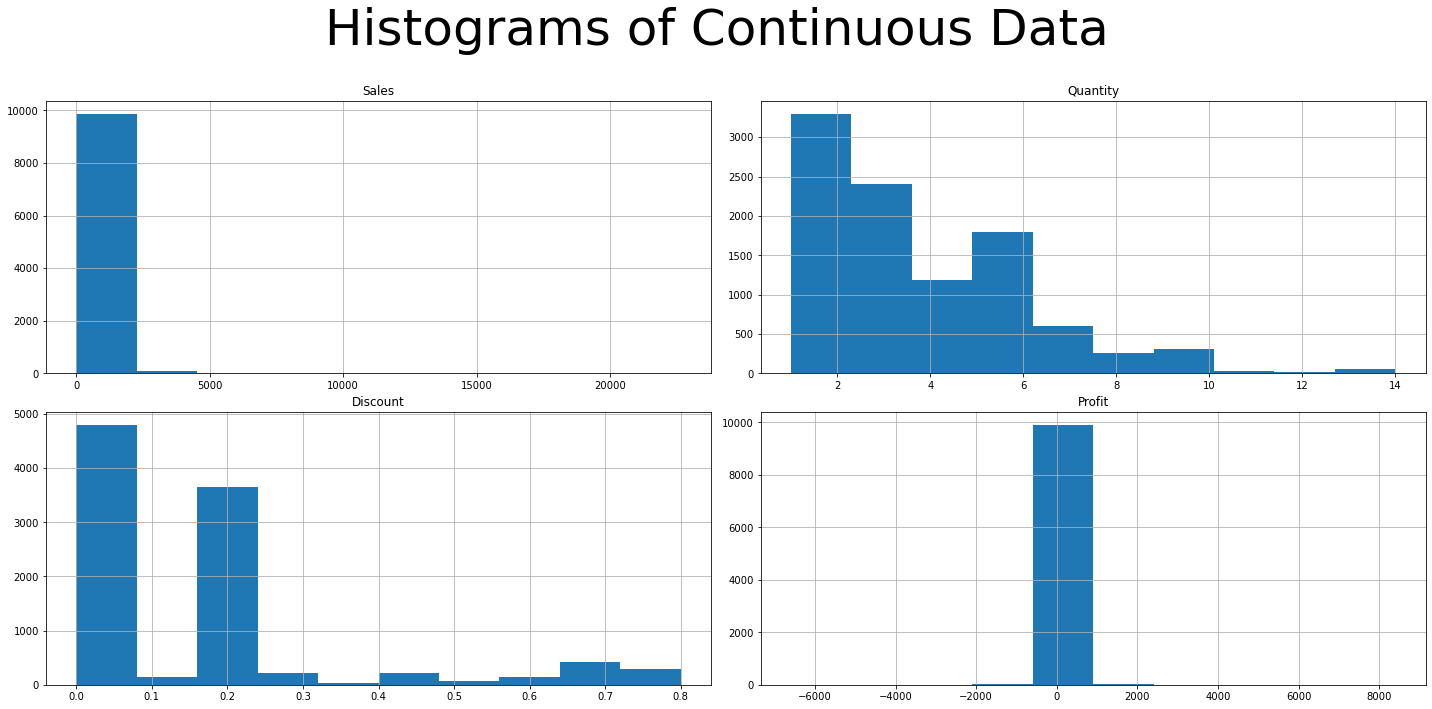

In [72]:
#Code for Continuous.
fig, axes = plt.subplots(2, 2, figsize=(20,10))
Sales = cont_df.Sales.hist(ax=axes[0,0]).set_title('Sales')
Quantity = cont_df.Quantity.hist(ax=axes[0,1]).set_title('Quantity')
Discount = cont_df.Discount.hist(ax=axes[1,0]).set_title('Discount')
Profit = cont_df.Profit.hist(ax=axes[1,1]).set_title('Profit')
fig.tight_layout()
fig.subplots_adjust(top=.85)
fig.suptitle("Histograms of Continuous Data", fontsize=50)
plt.show()

Data Visualization of Categorical Features.
This is every single graph that is a categorical feature, but the only ones that will need to be reported will be Segment, State, Category, and Sub-Category.

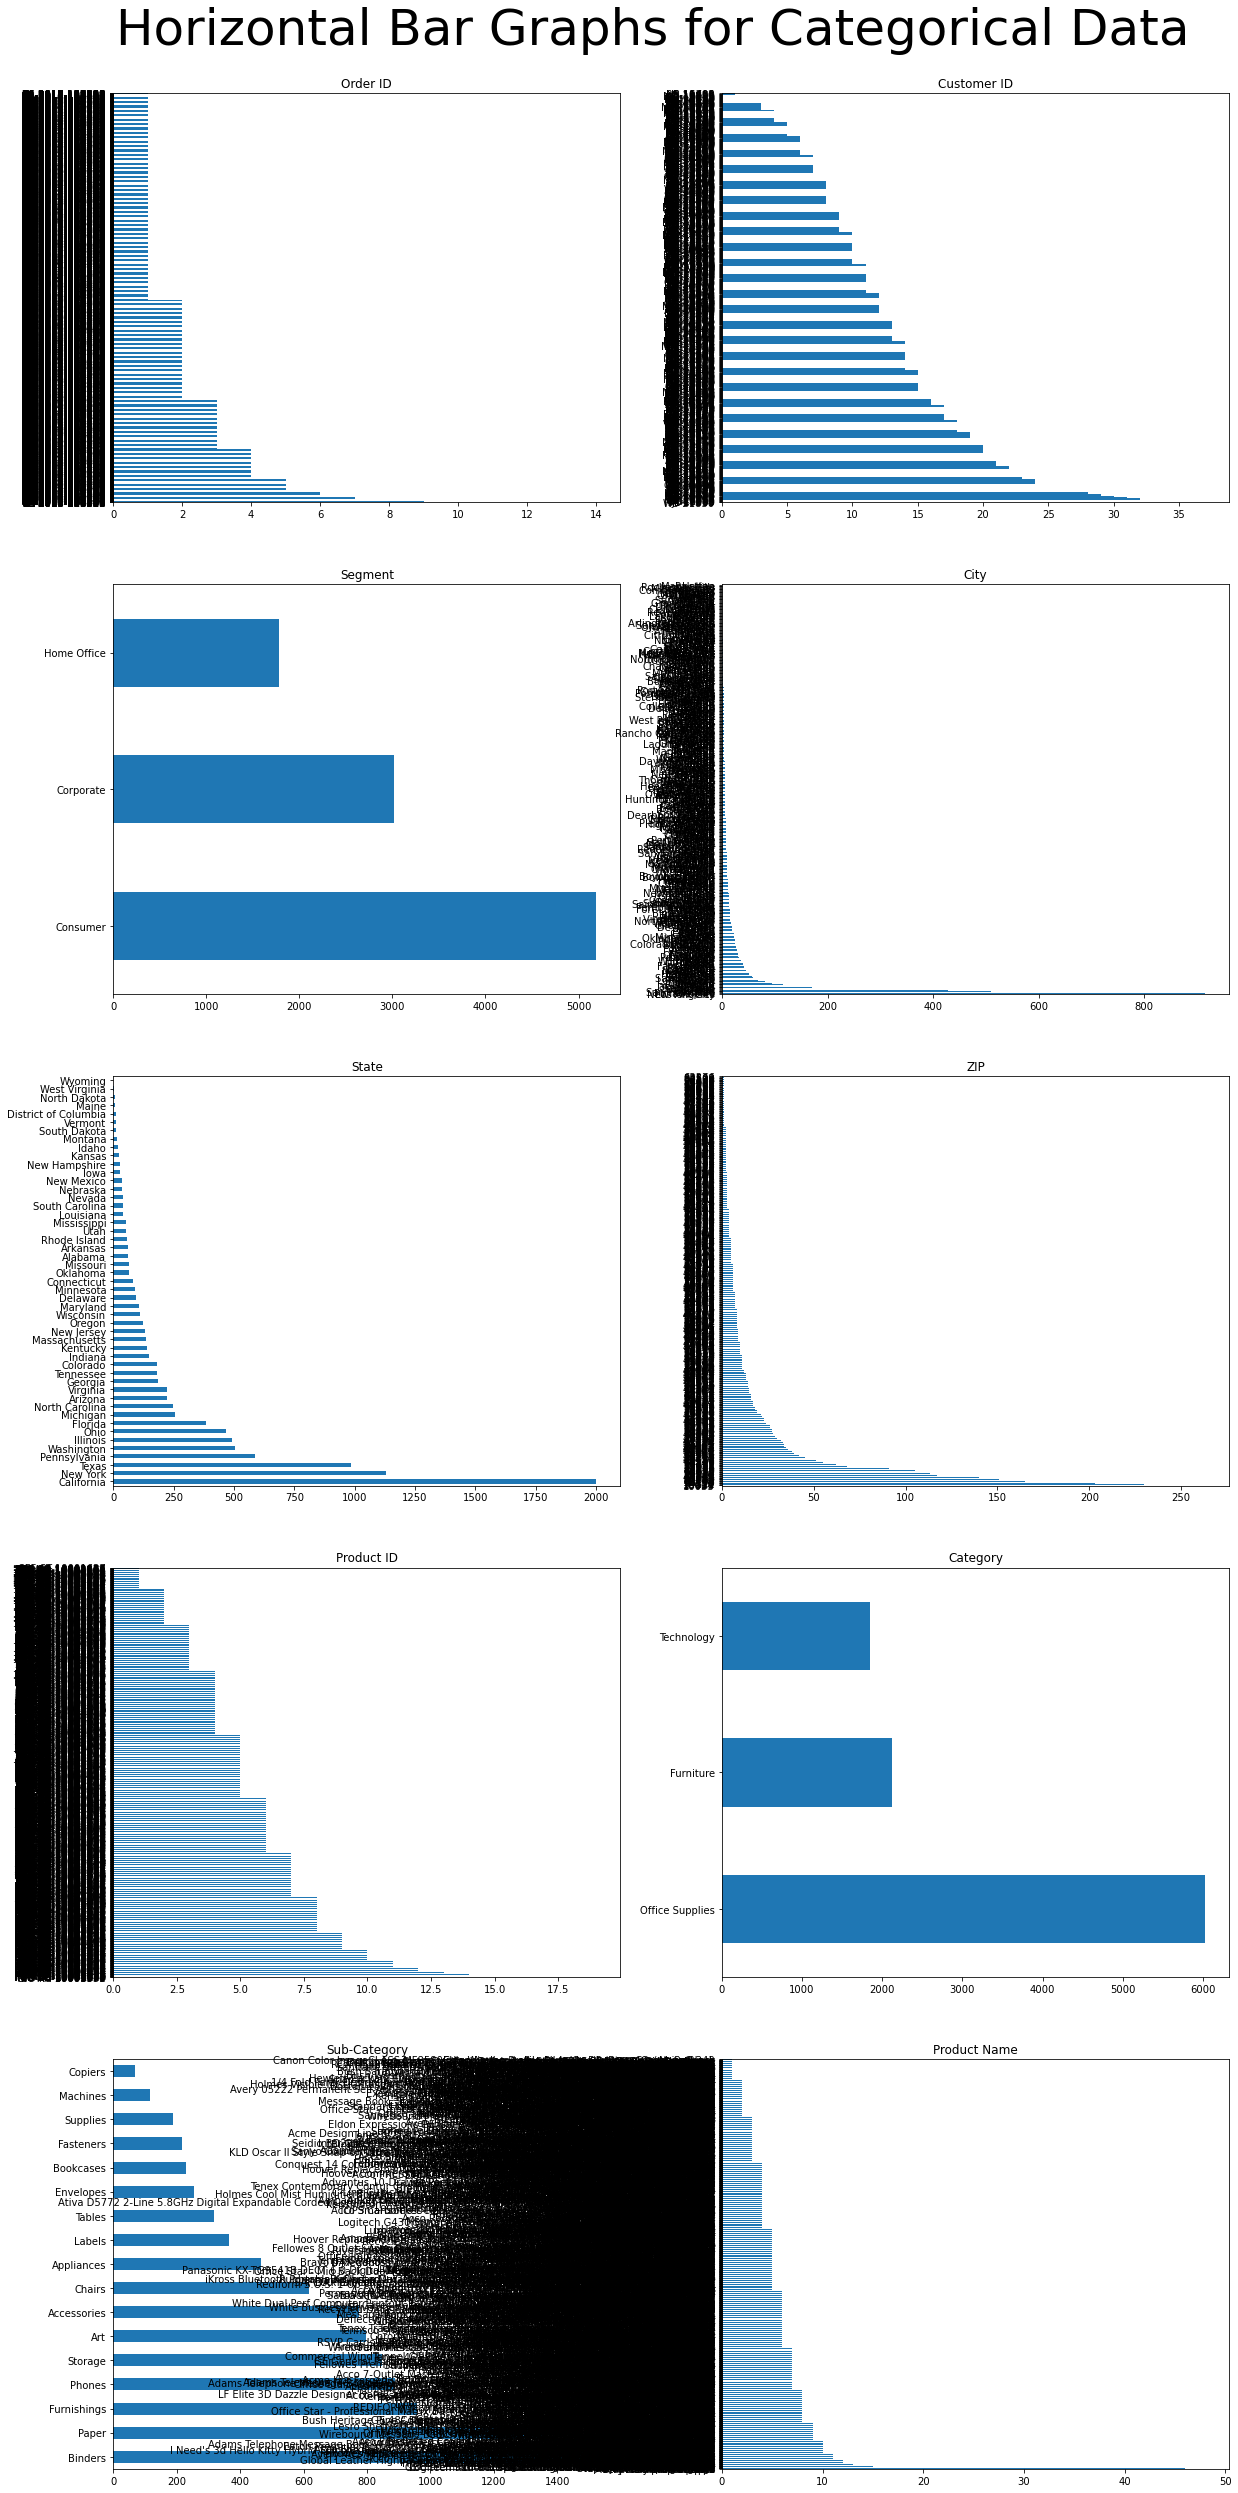

In [50]:
#Code for Categorical.
fig, axes = plt.subplots(5, 2, figsize = (20,40))
Order = cat_df["Order ID"].value_counts().plot(ax=axes[0,0], kind='barh').set_title('Order ID')
Customer = cat_df['Customer ID'].value_counts().plot(ax=axes[0,1], kind='barh').set_title('Customer ID')
Segment = cat_df['Segment'].value_counts().plot(ax=axes[1,0], kind='barh').set_title('Segment')
City = cat_df['City'].value_counts().plot(ax=axes[1,1],kind='barh').set_title('City')
State = cat_df['State'].value_counts().plot(ax=axes[2,0], kind='barh').set_title('State')
ZIP	= cat_df['Postal Code'].value_counts().plot(ax=axes[2,1], kind='barh').set_title('ZIP')
Product	= cat_df['Product ID'].value_counts().plot(ax=axes[3,0], kind='barh').set_title('Product ID')
Cateogry = cat_df['Category'].value_counts().plot(ax=axes[3,1], kind='barh').set_title('Category')
Sub	= cat_df['Sub-Category'].value_counts().plot(ax=axes[4,0], kind='barh').set_title('Sub-Category')
Product = cat_df['Product Name'].value_counts().plot(ax=axes[4,1], kind='barh').set_title('Product Name')


fig.subplots_adjust(top=.95)
fig.suptitle("Horizontal Bar Graphs for Categorical Data", fontsize=50)
plt.show()

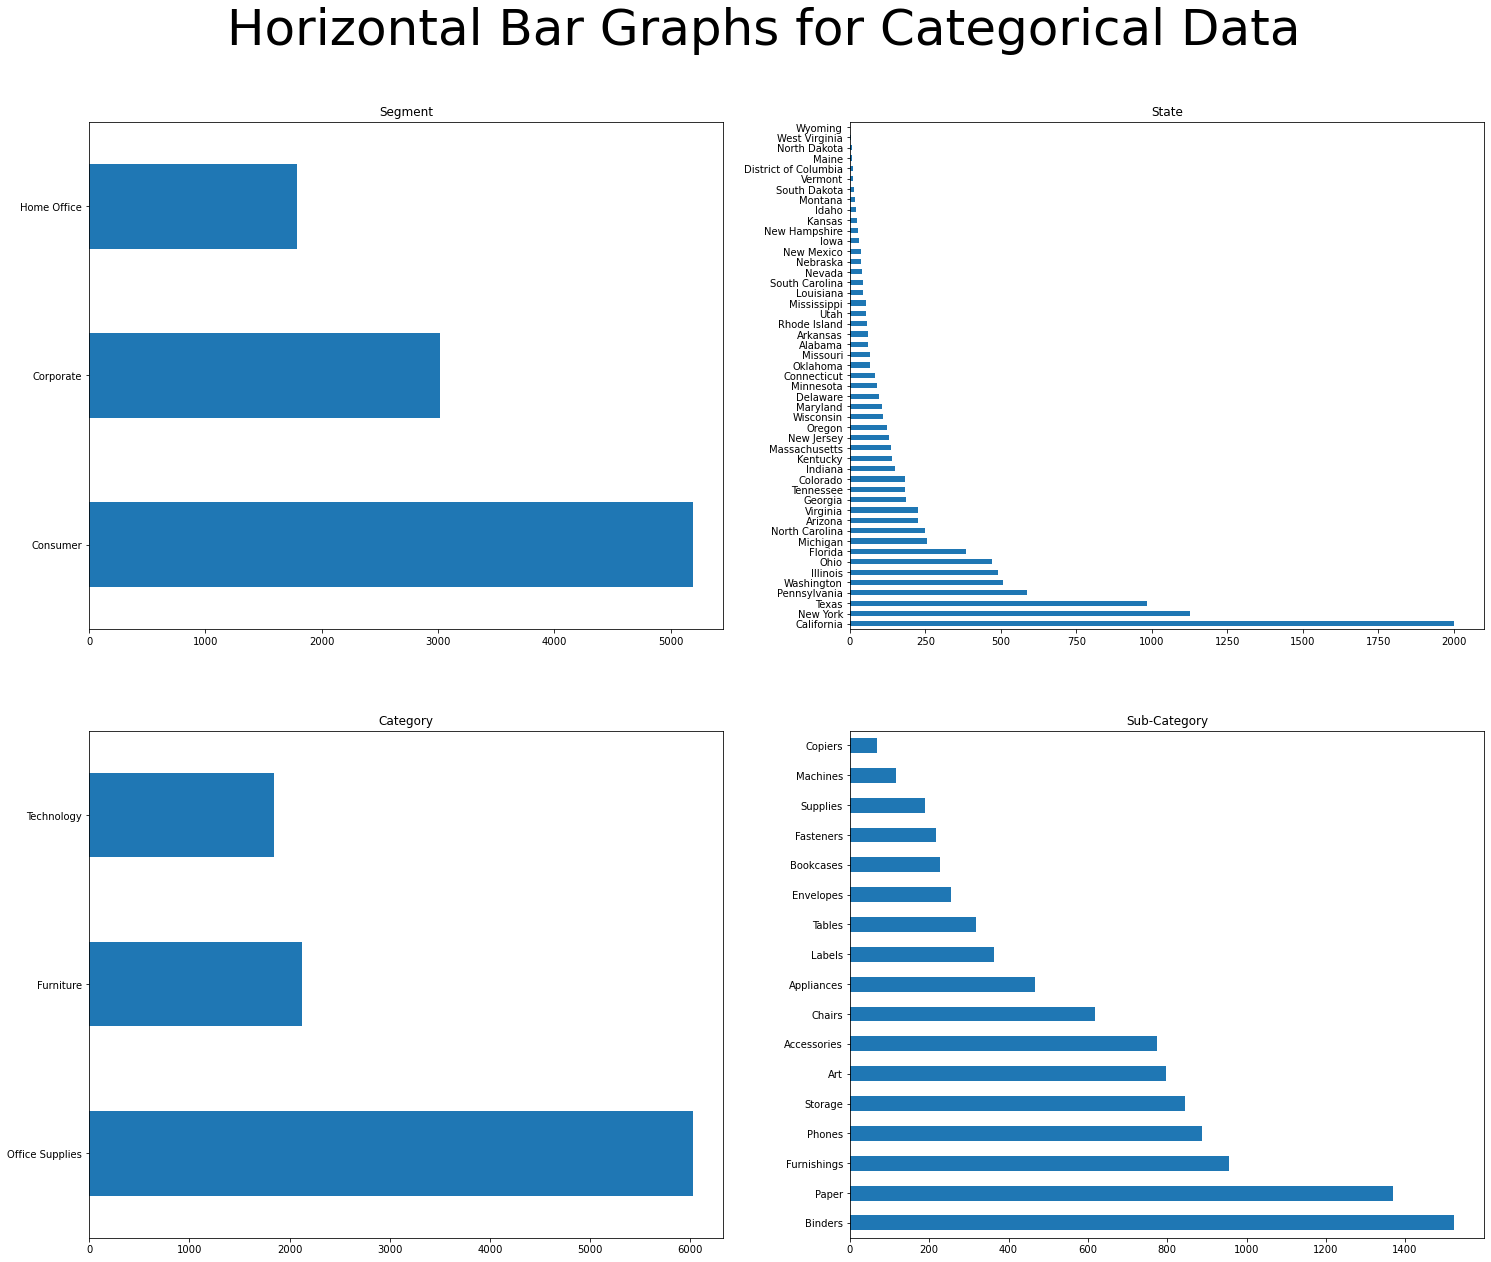

In [63]:
fig, axes = plt.subplots(2, 2, figsize = (30
                                          ,20))
Segment = cat_df['Segment'].value_counts().plot(ax=axes[0,0], kind='barh').set_title('Segment')
State = cat_df['State'].value_counts().plot(ax=axes[0,1], kind='barh').set_title('State')
Cateogry = cat_df['Category'].value_counts().plot(ax=axes[1,0], kind='barh').set_title('Category')
Sub	= cat_df['Sub-Category'].value_counts().plot(ax=axes[1,1], kind='barh').set_title('Sub-Category')


fig.subplots_adjust(top=.9)
fig.suptitle("Horizontal Bar Graphs for Categorical Data", fontsize=50)
plt.show()